<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_02-Data_Prep/Data_Prep_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prep

Your Name


## Getting Started

* Colab - get notebook from gitmystuff DTSC5502 repository
* Save a Copy in Drive
* Remove Copy of
* Edit your name
* Clean up Colab Notebooks folder
* Submit shared link

# Data Prep Introduction

* Types and characteristics of data
* Duplicates
* Constants
* Quasi-Constants
* Missing data
* Outliers
* Datetime
* Feature creation
* Discretization
* Categorical encoding
* Variable transformation
* Scaling

When performing data preparation, the order of operations is crucial for a robust and reproducible machine learning pipeline. While there isn't one single "best" order that fits every scenario, a logical and widely accepted sequence follows a general flow from broad data quality checks to more specific feature transformations. This ensures that early steps, like removing bad data, don't get skewed by later transformations.

The general best-practice order is:

1.  **Remove Bad Data and Redundancy:** Begin by identifying and removing data that's problematic at a fundamental level.
    * **Duplicates**: Removing duplicate rows is the first step. They can bias a model and inflate performance metrics.
    * **Constants**: Columns with only one unique value (constants) provide no information for a model to learn from. Removing them early reduces dimensionality and simplifies your dataset.
    * **Quasi-Constants**: Similar to constants, these features have very little variance (e.g., 99% of values are the same). It's generally a good idea to remove them as they offer minimal predictive power.

2.  **Handle Missing Data and Outliers:** Once your data is free of redundant rows and features, you can address quality issues within the remaining columns.
    * **Missing Data**: Decide on a strategy for handling missing values. This can involve dropping rows or columns with too much missing data, or **imputing** values using methods like the mean, median, or more advanced techniques.
    * **Outliers**: After addressing missing data, identify and handle outliers. Outliers can heavily influence the mean and other statistics, so it's important to deal with them before transformations or scaling.

3.  **Perform Feature Engineering:** This is a creative and domain-specific step where you can extract more information from your existing features.
    * **Datetime**: Extracting meaningful features from datetime columns, such as month, day of the week, or holiday flags, is a common and powerful technique. This should be done before more generic transformations.
    * **Feature Creation**: This is the core of feature engineering, where you create new variables based on your domain knowledge. For example, creating a `BMI` feature from `height` and `weight`.

4.  **Transform Variables and Features:** With a clean and feature-rich dataset, you can now prepare the variables for the specific requirements of your chosen model.
    * **Discretization**: If needed, convert continuous numerical features into discrete bins. This is often used for algorithms that benefit from binned data, like certain tree-based models.
    * **Categorical Encoding**: Convert all categorical features (which may have been `object` or `category` data types) into a numerical format. This is a non-negotiable step for most machine learning algorithms. The choice between one-hot encoding, label encoding, etc., depends on the nature of the data.

5.  **Scale Features:** The final step before training a model is often scaling, which adjusts the range of numerical features.
    * **Scaling**: This is especially important for distance-based algorithms like **K-nearest Neighbors** and models that use gradient descent, such as **Linear Regression** and **Neural Networks**. Common techniques are **Normalization** (Min-Max Scaling) and **Standardization** (Z-Score Scaling). This should be done **after** all other transformations to prevent data leakage and ensure the scaling is based on the final, prepared feature values.


# Create Data

### Seed the Project

In [ ]:
import time
import numpy as np
import random

def generate_user_seed():
    # Get current time in nanoseconds (more granular)
    nanoseconds = time.time_ns()

    # Add a small random component to further reduce collision chances
    random_component = random.randint(0, 1000)  # Adjust range as needed

    # Combine them (XOR is a good way to mix values)
    seed = nanoseconds ^ random_component

    # Ensure the seed is within the valid range for numpy's seed
    seed = seed % (2**32)  # Modulo to keep it within 32-bit range

    return seed

user_seed = generate_user_seed()
print(user_seed)
random_state = np.random.seed(user_seed)

In [ ]:
# seed
import random

seed_id = 123456789
random_state = random.seed(seed_id)
random_state

### Faker

In [ ]:
# pip install Faker

In [ ]:
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [ ]:
# create demographic data
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  binary = np.random.choice(['binary_1', 'binary_2'], p=[0.5, 0.5])
  output.append({
        'binary': binary, # sex assigned at birth
        'given_name': fake.first_name_female() if binary=='binary_1' else fake.first_name_male(),
        'datetime': fake.date_time_this_decade(),
        'surname': fake.last_name(),
        'date_of_birth': fake.date_of_birth(),
        'day_of_week': fake.day_of_week(),
        'phone_number': fake.phone_number(),
        'email': fake.email(),
        'address': fake.address(),
        'city': fake.city(),
        'state': np.random.choice(state_names),
        'zipcode': fake.zipcode(),
        })

demographics = pd.DataFrame(output)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,Unit 0834 Box 9260\nDPO AA 17860,Rachelfurt,Connecticut,02465
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,"659 Fitzpatrick Keys Suite 024\nPort Cynthia, ...",South Elizabethshire,New York,37282
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,"31799 Stephen Flats\nFostershire, NJ 18510",Novakshire,Pennsylvania,15896
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,Unit 9036 Box 6259\nDPO AA 05068,Davidburgh,Nebraska,57592
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,"1094 Rowland Cove Apt. 700\nBrownmouth, DE 54543",East Nicholastown,Vermont,91034


In [ ]:
def parse_address_v2(text):
  """
  Parses an address string into street address, city, state, and zipcode.
  This version handles potential variations in the input format.

  Args:
    text: The address string to parse.

  Returns:
    A dictionary containing the parsed address components.
  """

  try:
    # Split the input into lines
    lines = text.strip().split('\n')

    # Extract the street address from the first line
    street_address = lines[0].strip()

    # Extract the city, state, and zipcode from the second line
    city_state_zip = lines[1].strip().split(',')
    city = city_state_zip[0].strip()
    state_zip = city_state_zip[1].strip().split()
    state = state_zip[0].strip()
    zipcode = state_zip[1].strip()

    return {
        'street_address': street_address,
        'city': city,
        'state': state,
        'zipcode': zipcode
    }

  except (IndexError, ValueError):
    return None

# Example usage
text = "80974 Jeffrey Mountains\nWest Benjamin, IL 82801"
address = parse_address_v2(text)

if address:
  print(address)
else:
  print("Could not parse the address.")

{'street_address': '80974 Jeffrey Mountains', 'city': 'West Benjamin', 'state': 'IL', 'zipcode': '82801'}


In [ ]:
# Apply the parse_address function to each row of the 'address' column
demographics[['nu_address', 'nu_city', 'nu_state', 'nu_zipcode']] = demographics['address'].apply(lambda x: pd.Series(parse_address_v2(x)))

demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,nu_address,nu_city,nu_state,nu_zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,Unit 0834 Box 9260\nDPO AA 17860,Rachelfurt,Connecticut,02465,NaN,NaN,NaN,NaN
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,"659 Fitzpatrick Keys Suite 024\nPort Cynthia, ...",South Elizabethshire,New York,37282,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,"31799 Stephen Flats\nFostershire, NJ 18510",Novakshire,Pennsylvania,15896,31799 Stephen Flats,Fostershire,NJ,18510
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,Unit 9036 Box 6259\nDPO AA 05068,Davidburgh,Nebraska,57592,NaN,NaN,NaN,NaN
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,"1094 Rowland Cove Apt. 700\nBrownmouth, DE 54543",East Nicholastown,Vermont,91034,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543


In [ ]:
# drop address, city, state, zipcode and rename nu_ etc.
demographics.drop(['address', 'city', 'state', 'zipcode'], axis=1, inplace=True)
demographics.rename(columns={'nu_address': 'address', 'nu_city': 'city', 'nu_state': 'state', 'nu_zipcode': 'zipcode'}, inplace=True)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,18510
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543


### Create Independent Variable Correlated with Class

In [ ]:
import numpy as np
import pandas as pd

def generate_feature(df, class_col, coeff, intercept):
    """
    Generates normally distributed feature data for a logistic regression model.

    Args:
        df: The pandas DataFrame containing the class column.
        class_col: The name of the class column (containing 0s and 1s).
        coeff: The coefficient for the feature in the logistic regression model.
        intercept: The intercept of the logistic regression model.

    Returns:
        A pandas Series containing the generated feature data.
    """

    # Generate probabilities based on the class
    probs = np.random.rand(len(df))  # Initial random probabilities
    probs = np.where(df[class_col] == 1, probs * 0.8 + 0.2, probs * 0.8)  # Adjust for class

    # Apply the inverse logit (logit) function
    logits = np.log(probs / (1 - probs))

    # Calculate the feature values
    feature_values = (logits - intercept) / coeff

    return pd.Series(feature_values)



### Make Classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

def make_linear_y(row):
  model = LogisticRegression()
  model.fit(X, y)
  coefficients = model.coef_
  intercept = model.intercept_
  f_of_x = intercept + coefficients[0][0]*row['informative_1'] + coefficients[0][1]*row['informative_2']
  # print(f_of_x[0])
  return f_of_x[0]

# Adjust the make_classification parameters:
# Set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
df = pd.DataFrame(X, columns=['informative_1', 'informative_2'])
df = pd.concat([demographics, df], axis=1).reset_index(drop=True)

df['target'] = df.apply(make_linear_y, axis=1) # an independent variable
df['class'] = y # the dependent variable
df['corr_feature_class'] = generate_feature(df, 'class', 0.5, -1)
df.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,informative_1,informative_2,target,class,corr_feature_class
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN,-0.999102,-0.663860,-0.904224,1,2.769979
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681,1.246686,1.153597,2.324370,1,2.782714
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,18510,0.962777,0.859397,1.778217,1,2.609338
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN,-2.957441,2.033645,5.451235,1,4.873167
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543,1.141165,1.059449,2.153926,1,0.071820


### Automation Functions

1. gen_null(series, perc)
2. gen_quasi_constants(primary_label, variation_percentage=.2, replace=False)
3. gen_normal_data(mu=0, std=1, size=len(df))
4. gen_uniform_data(size=len(df))
5. gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
6. gen_correlated_normal_series(original_series, target_correlation, size=len(df))
7. gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
8. gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
9. gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000)
10. gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10)
11. random_choice_data(choices, size)

In [ ]:
# functions
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def gen_null(series, perc):
  """
  Introduces null values (np.nan) into a list based on a specified percentage.

  Args:
      var: The variable to modify.
      perc: The percentage of values to replace with nulls (0-100).

  Returns:
      The modified variable with null.
  """
  var = series.copy()
  num_nulls = int(len(var) * (perc / 100))
  indices_to_replace = np.random.choice(len(var), num_nulls, replace=False)

  for idx in indices_to_replace:
      var[idx] = np.nan

  return var

def gen_quasi_constants(primary_label, variation_percentage=.2, size=len(df)):
  """
  Generates quasi-constant labels for a Series, with a small percentage of variation.

  Args:
      primary_label: The main label to use for most values.
      variation_percentage: The percentage of labels to vary (0-100).

  Returns:
      A new Series containing the quasi-constant labels.
  """

  series = pd.Series(np.full(size, primary_label))
  num_variations = int(size * (variation_percentage / 100))
  variation_indices = np.random.choice(series.index, num_variations, replace=False)
  primary_label = primary_label + '_0'
  variation1 = primary_label + '_1'
  variation2 = primary_label + '_2'

  labels = pd.Series([primary_label] * len(series), index=series.index)
  labels.loc[variation_indices] = np.random.choice([variation1, variation2], size=num_variations)  # Adjust variations as needed

  return labels

def gen_normal_data(mu=0, std=1, size=len(df)):
  """
  Generates a normal dataset given the mean and standard deviation

  Args:
        mu: The mean of the normal distribution.
        std: The standard deviation of the normal distribution.
        size: The number of data points to generate.

  Returns:
        A normally distributed series.
  """
  return np.random.normal(mu, std, size)

def gen_uniform_data(size=len(df)):
  """
  Generates a uniform dataset

  Args:
        size: The number of data points to generate.

  Returns:
        A uniform distributed series.
  """
  return np.random.uniform(size=size)

def gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df)):
  """
  Generates two datasets with a multivariate normal distribution given the mean and covariance matrix

  Args:
        mean: The mean of each of the datasets.
        cov: The covariance matrix of the datasets.
        size: The number of data points to generate.

  Returns:
        Two correlated series.
  """
  ds1, ds2 = np.random.multivariate_normal(mean, cov, size, tol=1e-6).T # ds = dataset
  return ds1, ds2

def gen_correlated_normal_series(original_series, target_correlation, size=len(df)):
  """
  Generates a correlated series based on a given series.

  This function takes an original series as input and generates a new series
  that is correlated with the original series. The correlation between the
  original and generated series is approximately equal to the specified
  target correlation.

  The generated series is created by linearly transforming the original series
  and adding Gaussian noise with an adjusted standard deviation to achieve the
  desired correlation.

  Args:
      original_series (numpy.ndarray): The original series.
      target_correlation (float): The desired Pearson correlation coefficient
          between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series.
  """
  return np.mean(original_series) + target_correlation * (original_series - np.mean(original_series)) \
  +  np.random.normal(0, np.sqrt(1 - target_correlation**2) * np.std(original_series), len(original_series))
  """
  Explanation

  This one-liner leverages the properties of linear transformations and normal distributions to generate a correlated series.

  It first centers the original_series by subtracting its mean.
  It then scales this centered series by the target_correlation.
  Finally, it adds Gaussian noise with a standard deviation adjusted to ensure the overall correlation matches the target_correlation.
  """

def gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df)):
  """
  Work in progress

  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.
      size: The number of data points to generate.

  Returns:
      The generated correlated series with a uniform distribution.
  """
  z_scores = (original_series - np.mean(original_series)) / np.std(original_series)
  correlation_coefficient=.7
  return norm.cdf(correlation_coefficient * norm.ppf(np.random.uniform(size=size)) + np.sqrt(1 - correlation_coefficient**2) * z_scores)

def pearson_r_func(x, y, y_mean, y_std, desired_r):
    x_mean = np.mean(x)
    x_std = np.std(x)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = x_std * y_std * len(x)
    calculated_r = numerator / denominator
    return (calculated_r - desired_r)**2  # Minimize the squared difference

def minimize_r(original_series, target_correlation, size=len(df)):
    y = original_series
    y_mean = np.mean(y)
    y_std = np.std(y)
    desired_r = target_correlation

    # Initial guess for x values
    x0 = np.random.uniform(size=len(original_series))

    # Solve for x
    result = minimize(pearson_r_func, x0, args=(y, y_mean, y_std, desired_r))

    if result.success:
        x_solution = result.x
        # print("Solution for x:", x_solution)
        return x_solution
    else:
        print("Optimization failed.")

def gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3):
    """
    Generates a normal distribution with outliers.

    Args:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        size (int): The number of samples to generate.
        outlier_percentage (float): The percentage of outliers to introduce (between 0 and 1).
        outlier_magnitude (float): The magnitude by which outliers deviate from the mean.

    Returns:
        numpy.ndarray: The generated data with outliers.
    """
    data = np.random.normal(mean, std_dev, size)
    num_outliers = int(size * outlier_percentage)
    outlier_indices = np.random.choice(size, num_outliers, replace=False)
    for index in outlier_indices:
        if np.random.rand() < 0.5:
            data[index] += outlier_magnitude
        else:
            data[index] -= outlier_magnitude

    return data

def gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000):
  """
  Generates data with a specified mean and standard deviation, then scales it by a factor to create a distribution needing scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      scale_factor (float): The factor by which to scale the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """
  original_data = np.random.normal(mean, std_dev, size)
  return original_data * scale_factor

def gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10):
  """
  Generates data with a specified mean and standard deviation, then scales and shifts it to create a distribution needing MinMax scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      range_factor (float): The factor to expand the range of the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """

  # Generate the original data
  original_data = np.random.normal(mean, std_dev, size)

  # Expand the range of the data
  min_val = np.min(original_data)
  max_val = np.max(original_data)
  return (original_data - min_val) * range_factor + min_val

def random_choice_data(choices, size):
  """
  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series with a uniform distribution.
  """
  return np.random.choice(choices, size=size)


In [ ]:
# categorical variables with little correlation to sales
df['random choice 2'] = random_choice_data(['Rand Choice 1', 'Rand Choice 2'], size=len(df))
df['random choice 4'] = random_choice_data(['North', 'South', 'East', 'West'], size=len(df))
df['random choice 7'] = random_choice_data(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df))

# categorical random choices with random # of labels
num_labels = np.random.randint(3, 5)
df[f'random label num {num_labels}'] = random_choice_data([f'label num lo {i}' for i in range(1, num_labels + 1)], size=len(df))

num_labels = np.random.randint(10, 15)
df[f'random label num {num_labels}'] = random_choice_data([f'label num hi {i}' for i in range(1, num_labels + 1)], size=len(df))

In [ ]:
# categorical variables correlated with target
df['pd qcut1'] = pd.qcut(df['target'], 2, labels=['Low', 'High']) # bi label
df['pd qcut2'] = pd.qcut(df['target'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 4 labels

quantiles = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
df['pd qcut3'] = pd.qcut(df['target'], quantiles, labels=['G1', 'G2', 'G3', 'G4', 'G5', 'G6']) # 6 labels

In [ ]:
# generate four numerical normally distributed continuous features that have a correlation greater than absolute value of .5 with each other
# gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
df['multicollinearity 1'], df['multicollinearity 2'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .7], [.7, 1]], size=len(df))
df['multicollinearity 3'], df['multicollinearity 4'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .9], [.9, 1]], size=len(df))

In [ ]:
# generate two normally distributed features that are correlated with the target
# gen_correlated_normal_series(original_series, target_correlation, size=len(df))
df['correlated w target 1'] = gen_correlated_normal_series(df['target'], target_correlation=.5)
df['correlated w target 2'] = gen_correlated_normal_series(df['target'], target_correlation=.7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1000 non-null   object  
 1   given_name             1000 non-null   object  
 2   surname                1000 non-null   object  
 3   date_of_birth          1000 non-null   object  
 4   phone_number           1000 non-null   object  
 5   email                  1000 non-null   object  
 6   address                898 non-null    object  
 7   city                   898 non-null    object  
 8   state                  898 non-null    object  
 9   zipcode                898 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     1000 non-null   fl

                uniform corr 1  uniform corr 2    target
uniform corr 1        1.000000        0.472197  0.687678
uniform corr 2        0.472197        1.000000  0.682066
target                0.687678        0.682066  1.000000


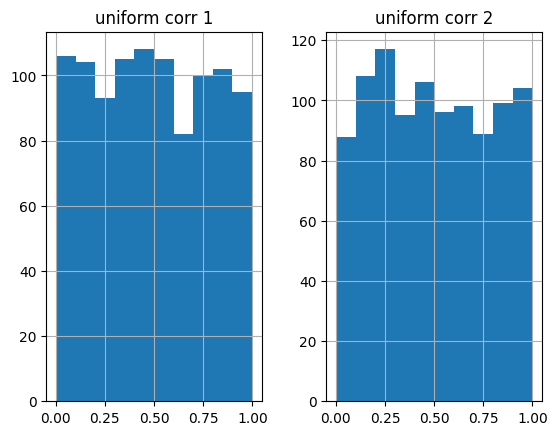

In [ ]:
# generate two uniformly distributed features that are correlated with the target
# gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
df['uniform corr 1'] = gen_correlated_uniform_series(df['target'])
df['uniform corr 2'] = gen_correlated_uniform_series(df['target'])

print(df[['uniform corr 1', 'uniform corr 2', 'target']].corr())
df[['uniform corr 1', 'uniform corr 2']].hist();

In [ ]:
# create two features that are duplicates of other features
df['duplicate_1'] = df['informative_1']
df['duplicate_2'] = df['informative_2']

In [ ]:
# create two numerical features with outliers
df['outliers 1'] = gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
df['outliers 2'] = gen_outliers(mean=3, std_dev=2, size=len(df), outlier_percentage=0.2, outlier_magnitude=2)

In [ ]:
# create a numerical feature that needs standard scaling
df['standard scaling'] = gen_standard_scaling()

In [ ]:
# create a numerical feature that needs min max scaling
df['min max scaling'] = gen_minmax_scaling()

In [ ]:
# generate null values
for col in df.drop(['class', 'informative_1', 'informative_2', 'target', 'duplicate_1', 'duplicate_2'], axis=1).columns:
    df[col] = gen_null(df[col], np.random.choice([0, 5, 10, 20, 30, 50], size=1).item())

In [ ]:
# create two features that have constant values
df['constant_1'] = 'constant_value'
df['constant_2'] = 'constant_value'

In [ ]:
# create two features with semi constant values
df['semi_constant_1'] = gen_quasi_constants('q_const', variation_percentage = 1)
df['semi_constant_2'] = gen_quasi_constants('q_const', variation_percentage = 1)

In [ ]:
print(df.info())  # check your work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1000 non-null   object  
 1   given_name             700 non-null    object  
 2   surname                700 non-null    object  
 3   date_of_birth          800 non-null    object  
 4   phone_number           500 non-null    object  
 5   email                  800 non-null    object  
 6   address                631 non-null    object  
 7   city                   623 non-null    object  
 8   state                  806 non-null    object  
 9   zipcode                626 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     700 non-null    fl

In [ ]:
# add duplicates
dupes = df.loc[0:9]
df = pd.concat([df, dupes], axis=0)

# shuffle all columns
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1, axis=1)

# shuffle selected columns
demographic_columns = demographics.columns
remaining_columns = [col for col in df.columns if col not in demographic_columns]
# print(remaining_columns)
np.random.shuffle(remaining_columns)

# Reassemble the DataFrame with the shuffled columns
df = df[list(demographic_columns) + list(remaining_columns)]

# move target to the end of the list
class_var = 'class'
df = df[df.drop('class', axis=1).columns.tolist() + [class_var]]

print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1010 non-null   object  
 1   given_name             707 non-null    object  
 2   surname                705 non-null    object  
 3   date_of_birth          807 non-null    object  
 4   phone_number           507 non-null    object  
 5   email                  808 non-null    object  
 6   address                637 non-null    object  
 7   city                   628 non-null    object  
 8   state                  814 non-null    object  
 9   zipcode                630 non-null    object  
 10  correlated w target 2  808 non-null    float64 
 11  standard scaling       1010 non-null   float64 
 12  pd qcut2               807 non-null    category
 13  uniform corr 1         706 non-null    float64 
 14  informative_1          1010 non-null 

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,pd qcut3,random label num 4,duplicate_1,random choice 2,duplicate_2,random choice 7,outliers 2,random choice 4,multicollinearity 3,class
0,binary_2,NaN,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN,...,NaN,label num lo 4,-0.999102,Rand Choice 1,-0.663860,Monday,2.991296,South,1.483556,1
1,binary_2,Spencer,Robertson,NaN,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,NaN,...,NaN,label num lo 2,1.246686,Rand Choice 2,1.153597,Monday,1.115868,West,2.472647,1
2,binary_1,NaN,NaN,NaN,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,NaN,...,G5,label num lo 3,0.962777,Rand Choice 1,0.859397,NaN,4.863430,West,0.548869,1
3,binary_1,Lauren,NaN,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN,...,G6,label num lo 2,-2.957441,Rand Choice 1,2.033645,Sunday,3.131133,North,NaN,1
4,binary_1,Toni,NaN,1920-12-21,NaN,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543,...,G5,NaN,1.141165,Rand Choice 1,1.059449,Wednesday,-0.016231,South,-0.310186,1


In [ ]:
df.to_csv('.../raw_data.csv', index=False)

In [ ]:
# # Mount Drive
# import shutil

# # Source file path (within your Drive)
# source_file = '/content/filename'

# # Destination path (root of your Drive)
# destination_path = '/content/drive/MyDrive/filepath/filename'

# # Copy the file
# shutil.copy(source_file, destination_path)

# Data Prep Process

## Load Data

# Code Along

In [ ]:
import pandas as pd

df = pd.read_csv('.../raw_data.csv')
print(df.shape)
print(df.info())
df.head()

# Make It Stick - Characteristics of Data

## Types and Characteristics of Data

**Numerical Data**

This refers to columns with a numerical data type, typically integers (`int64`) or floating-point numbers (`float64`). These data represent quantities and are used for mathematical operations.

* **Characteristics**:
    * **Continuous**: Can take any value within a given range (e.g., height, temperature, price).
    * **Discrete**: Can only take specific, distinct values (e.g., number of children, counts).
    * **Order**: The values have a meaningful order and can be compared (e.g., 10 is greater than 5).
    * **Mathematical Operations**: Can be used for calculations like mean, standard deviation, and regression analysis.

**Object/String Data**

This refers to columns with an `object` data type, which in pandas often means they contain text or strings. These are non-numeric and don't have inherent mathematical properties.

* **Characteristics**:
    * **Nominal**: Categories without a meaningful order (e.g., colors like "red," "blue," "green").
    * **Textual**: Contains free-form text, which might require natural language processing (NLP) techniques for analysis.
    * **High Cardinality**: Often contain a large number of unique values, making them difficult to use directly in many machine learning models without preprocessing.

**Categorical Data**

This refers to columns with a `category` data type. A `category` type is a pandas-specific data type that is more memory-efficient than `object` for columns with a limited number of unique values.

* **Characteristics**:
    * **Ordinal**: Categories with a meaningful order (e.g., "low," "medium," "high").
    * **Nominal**: Categories without a meaningful order (as with `df_object`).
    * **Memory Efficient**: Internally stores an integer representation of each category, which is more efficient for storage and computation.

**Categorical Features**

This is a combined group of columns from both the `category` and `object` data types. These columns represent features that are **not** numerical and will likely need to be converted to a numerical format using encoding techniques (like **One-Hot Encoding** or **Label Encoding**) before being used in most machine learning models.

* **Characteristics**:
    * **Mixed Types**: A collection of both `category` and `object` data types.
    * **Preprocessing Required**: These features cannot be directly used in most machine learning algorithms. They must be preprocessed to a numerical representation.
    * **High-level Representation**: This group represents all the columns in a dataset that are qualitative rather than quantitative.

In [ ]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
print("Numerical Data:")
print(df_numerical)
print("/nObject Data:")
print(df_object)
print("/nDiscreet Data:")
print(df_discreet)
print("/nCategorical Data:")
print(df_categorical_features

Index(['pd qcut2', 'pd qcut1', 'pd qcut3'], dtype='object')

In [ ]:
import numpy as np
import pickle

df_numerical = df.select_dtypes(exclude=['category', 'object']).columns.to_list()
df_object = df.select_dtypes(include=['object']).columns.to_list()
df_discreet = df.select_dtypes(include=['category']).columns.to_list()
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns.to_list()

# Create a variable to pickle
data = {'df_numerical': df_numerical, 'df_object': df_object, 'df_discreet': df_discreet, 'df_categorical_features': df_categorical_features}

# Pickle the variable and save it to a file
with open('.../var_types.pkl', 'wb') as f:
    pickle.dump(data, f)


## Row Duplicates

In [ ]:
len(df[df.duplicated(keep=False)])

## Column Duplicates

### By Code

In [ ]:
duplicate_features = []
for i in range(0, len(df.columns)):
    orig = df.columns[i]

    for dupe in df.columns[i + 1:]:
        if df[orig].equals(df[dupe]):
            duplicate_features.append(dupe)

duplicate_features

### By Colab AI

# Code Along

## Constants

### By Code

In [ ]:
constant_features = [
    feat for feat in df.columns if len(df[feat].unique()) == 1
]

constant_features

### By Colab AI

# Code Along

## Quasi-Constants

In [ ]:
quasi_consts = []
thresh = .95
for val in df.columns.sort_values():
    if (len(df[val].unique()) < 3 and max(df[val].value_counts(normalize=True)) > thresh):
        quasi_consts.append(val)

quasi_consts

## Missing Values (Imputation)

right skew data mean: 8.0, median: 6.79
left skew data mean: -7.98, median: -6.75
normal data mean: -0.0, median: -0.0


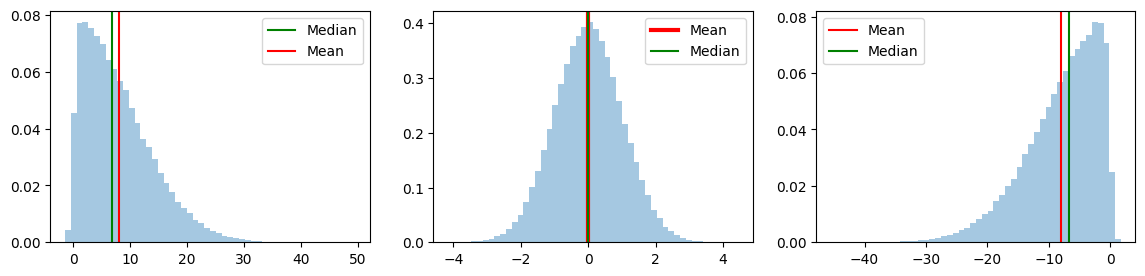

In [ ]:
# what happens to the mean and median with skewed data
import numpy as np
from scipy.stats import skewnorm, norm
from scipy import stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
skew = 20
n = 100000

r = skewnorm.rvs(skew, loc=0, scale=10, size=n)
ax[0].hist(r, bins=50, density=True, alpha=0.4)
ax[0].axvline(x=np.median(r), color='green', label='Median')
ax[0].axvline(x=np.mean(r).round(2), color='red', label='Mean')
ax[0].legend()
print(f'right skew data mean: {np.mean(r).round(2)}, median: {np.median(r).round(2)}')

l = skewnorm.rvs(-skew, loc=0, scale=10, size=n)
ax[2].hist(l, bins=50, density=True, alpha=0.4);
ax[2].axvline(x=np.mean(l).round(2), color='red', label='Mean')
ax[2].axvline(x=np.median(l), color='green', label='Median')
ax[2].legend()
print(f'left skew data mean: {np.mean(l).round(2)}, median: {np.median(l).round(2)}')

n = norm.rvs(loc=0, scale=1, size=n)
ax[1].hist(n, bins=50, density=True, alpha=0.4);
ax[1].axvline(x=np.mean(n).round(2), color='red', linewidth=3, label='Mean')
ax[1].axvline(x=np.median(n), color='green', label='Median')
ax[1].legend()
print(f'normal data mean: {np.mean(n).round(2)}, median: {np.median(n).round(2)}')

In [ ]:
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
dfx = df.copy()
for feat in df.columns[df.isnull().sum() > 1]:
  if feat in df_categorical_features:
    dfx[feat] = df[feat].fillna(df[feat].mode()[0])
  else:
    if abs(df[feat].skew()) < .8:
      dfx[feat] = df[feat].fillna(round(df[feat].mean(), 2))
    else:
      dfx[feat] = df[feat].fillna(df[feat].median())

dfx

## Outliers

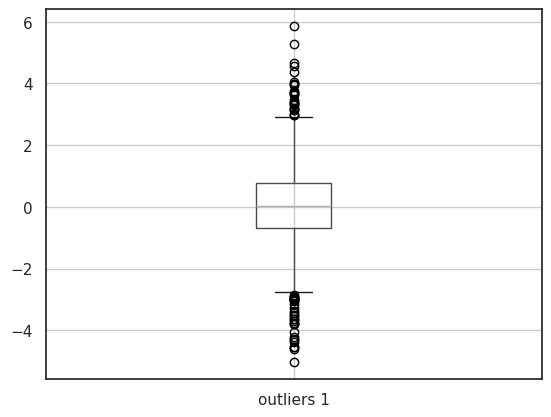

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

In [ ]:
# code along
df.describe()

,correlated w target 2,standard scaling,uniform corr 1,informative_1,outliers 1,correlated w target 1,min max scaling,target,multicollinearity 4,multicollinearity 2,multicollinearity 1,informative_2,corr_feature_class,uniform corr 2,duplicate_1,duplicate_2,outliers 2,multicollinearity 3,class
count,808.000000,1010.000000,706.000000,1010.000000,907.000000,1010.000000,909.000000,1010.000000,807.000000,960.000000,705.000000,1010.000000,707.000000,505.000000,1010.000000,1010.000000,1010.000000,908.000000,1010.000000
mean,0.095813,49976.747513,0.494449,-0.047372,0.049798,0.174808,422.422403,0.195609,-0.066657,-0.055818,0.011434,-0.018978,2.055578,0.489747,-0.047372,-0.018978,2.895015,-0.046892,0.502970
std,2.955398,10208.332456,0.288302,1.324010,1.346687,2.978709,100.182792,2.991347,1.007869,0.970038,1.001267,1.403413,3.233617,0.295246,1.324010,1.403413,2.196185,1.023693,0.500239
min,-8.161661,8175.893046,0.003231,-3.836929,-5.030864,-10.241793,9.271920,-8.943212,-2.954008,-3.088686,-2.809906,-4.543441,-12.790567,0.001699,-3.836929,-4.543441,-3.794006,-3.263191,0.000000
25%,-1.930904,43459.789290,0.244874,-1.018399,-0.680592,-1.941877,356.324631,-2.166961,-0.741500,-0.708669,-0.647445,-1.050339,0.177714,0.217855,-1.018399,-1.050339,1.407231,-0.701439,0.000000
50%,0.102482,49740.181469,0.484182,-0.224366,0.016721,0.120585,424.239276,-0.011259,-0.090804,-0.089010,-0.034434,-0.194004,2.001172,0.475996,-0.224366,-0.194004,2.932398,-0.001473,1.000000
75%,2.173246,57013.783873,0.745422,0.975364,0.759216,2.247761,488.055011,2.367192,0.642672,0.559828,0.656427,0.991017,3.800447,0.739002,0.975364,0.991017,4.281866,0.602101,1.000000
max,10.426718,85289.199605,0.998136,3.994644,5.863531,10.552818,723.573055,9.299296,3.267778,3.129346,2.993883,4.020262,18.965600,0.999146,3.994644,4.020262,10.657751,2.905544,1.000000


In [ ]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1010 non-null   object  
 1   given_name             707 non-null    object  
 2   surname                705 non-null    object  
 3   date_of_birth          807 non-null    object  
 4   phone_number           507 non-null    object  
 5   email                  808 non-null    object  
 6   address                637 non-null    object  
 7   city                   628 non-null    object  
 8   state                  814 non-null    object  
 9   zipcode                630 non-null    object  
 10  correlated w target 2  808 non-null    float64 
 11  standard scaling       1010 non-null   float64 
 12  pd qcut2               807 non-null    category
 13  uniform corr 1         706 non-null    float64 
 14  informative_1          1010 non-null   float64 


In [ ]:
# code along
nu_df[df_numerical] = nu_df[df_numerical].astype(float)
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 1000 non-null   object 
 1   given_name             1000 non-null   object 
 2   surname                1000 non-null   object 
 3   date_of_birth          1000 non-null   object 
 4   phone_number           1000 non-null   object 
 5   email                  1000 non-null   object 
 6   address                1000 non-null   object 
 7   city                   1000 non-null   object 
 8   state                  1000 non-null   object 
 9   zipcode                1000 non-null   object 
 10  correlated w target 2  1000 non-null   float64
 11  standard scaling       1000 non-null   float64
 12  pd qcut2               1000 non-null   object 
 13  uniform corr 1         1000 non-null   float64
 14  informative_1          1000 non-null   float64
 15  semi_

## Datetime

## Feature Creation

In [ ]:
# create a new variable by combining two variables
df['scaling_combined'] = df['standard scaling'] + df['min max scaling']
df.drop(['standard scaling', 'min max scaling'], axis=1, inplace=True)

## Discretization

## Categorical Encoding
* Sklearn One Hot Encoding
* Dummy Trap
* Pandas get_dummies
* Labelizer
* Weight of Evidence
* Frequency Encoding

### Categorical Data
* Nominal (Cat or Dog)
* Ordinal (Grades)
* Works better for limited labels in a category
* Engineer features with many labels

### Multicollinearity
* Predictors need to be independent of each other
* https://www.theanalysisfactor.com/multicollinearity-explained-visually/
* https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
* Cats_and_Dogs = [Cat, Dog, Dog, Cat, Cat, Dog]
* Cats = [1, 0, 0, 1, 1, 0]
* Dogs = [0, 1, 1, 0, 0, 1]

### Beware of Mismatch in Training and Test

* Some labels in the train set don't show up in the test set

https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde

### One Hot Encoder

In [ ]:
# sklearn OneHotEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

pets = ['dog', 'cat', 'cat', 'dog', 'turtle', 'cat', 'cat', 'turtle', 'dog', 'cat']
print('cat = 0; dog = 1; turtle = 2')
le = LabelEncoder()
int_values = le.fit_transform(pets)
print('Pets:', pets)
print('Label Encoder:', int_values)
int_values = int_values.reshape(len(int_values), 1)
print(pd.Series(pets))

ohe = OneHotEncoder(sparse_output=False)
ohe = ohe.fit_transform(int_values)
print('One Hot Encoder:\n', ohe)

lb = LabelBinarizer()
print('Label Binarizer:\n', lb.fit_transform(int_values))

cat = 0; dog = 1; turtle = 2
Pets: ['dog', 'cat', 'cat', 'dog', 'turtle', 'cat', 'cat', 'turtle', 'dog', 'cat']
Label Encoder: [1 0 0 1 2 0 0 2 1 0]
0       dog
1       cat
2       cat
3       dog
4    turtle
5       cat
6       cat
7    turtle
8       dog
9       cat
dtype: object
One Hot Encoder:
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Label Binarizer:
 [[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


In [ ]:
pets = pd.DataFrame(pd.Series(pets), columns=['Pets'])
pets.head()

,Pets
0,dog
1,cat
2,cat
3,dog
4,turtle


In [ ]:
ohe = OneHotEncoder(sparse_output=False)
ohe_pets = ohe.fit_transform(pets)
pets_df = pd.DataFrame(ohe_pets, columns=ohe.get_feature_names_out(['Pets']))
pets_df

,Pets_cat,Pets_dog,Pets_turtle
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


# Make It Stick - Dummy Trap

### Dummy Trap

The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

https://www.learndatasci.com/glossary/dummy-variable-trap/

The **dummy trap** is a problem that occurs in regression analysis when a categorical variable with multiple categories is encoded into dummy variables. It creates a situation of **perfect multicollinearity**, where one dummy variable can be perfectly predicted from a linear combination of the other dummy variables.

**How It Happens**

When you use a technique like **one-hot encoding** to convert a categorical variable (e.g., "City" with categories "New York," "Chicago," and "Boston") into numerical data, you create a new binary column for each category. For any given data point, one of these new columns will be a `1` and the rest will be `0`s.

* **Example**: If you have three cities, you create three dummy variables: `is_New_York`, `is_Chicago`, and `is_Boston`. A row for a person in New York would have `is_New_York` = 1, `is_Chicago` = 0, and `is_Boston` = 0.

The trap arises because there's a **redundant variable**. If you know the values for `is_New_York` and `is_Chicago`, you can perfectly predict the value for `is_Boston`: if `is_New_York` is 0 and `is_Chicago` is 0, then `is_Boston` must be 1. This linear relationship between the variables violates a key assumption of many regression models (like linear regression), making it impossible to uniquely calculate the coefficients for each variable.

### The Solution

To avoid the dummy trap, you must **drop one of the dummy variables**. This is also known as using "dummy encoding" instead of one-hot encoding. By having only $k-1$ dummy variables for a categorical variable with $k$ categories, you eliminate the perfect multicollinearity. The dropped category becomes the **baseline** or **reference category**, and the coefficients of the remaining dummy variables are interpreted in comparison to that baseline.

In [ ]:
pets_df.corr()

,Pets_cat,Pets_dog,Pets_turtle
Pets_cat,1.000000,-0.654654,-0.500000
Pets_dog,-0.654654,1.000000,-0.327327
Pets_turtle,-0.500000,-0.327327,1.000000


In [ ]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_pets = ohe.fit_transform(pets)
pets_df = pd.DataFrame(ohe_pets, columns=ohe.get_feature_names_out(['Pets']))
pets_df

,Pets_dog,Pets_turtle
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,0.0
6,0.0,0.0
7,0.0,1.0
8,1.0,0.0
9,0.0,0.0


In [ ]:
pets_df.corr()

,Pets_dog,Pets_turtle
Pets_dog,1.000000,-0.327327
Pets_turtle,-0.327327,1.000000


### Day of Week Encoding

* https://mikulskibartosz.name/time-in-machine-learning

The best way to encode days of the week for machine learning depends on whether the model can recognize and use the inherent **cyclical** nature of the data. The two most effective methods are **one-hot encoding** and **sinusoidal (or cyclical) encoding**.

**One-Hot Encoding**
One-hot encoding is a straightforward method that creates a new binary column for each day of the week. This is an excellent choice for models that don't inherently handle cyclical data well, such as linear regression and tree-based models (e.g., Random Forest, Gradient Boosting).

* **How it works**: A feature like "Day of Week" with values like 'Monday', 'Tuesday', etc., is transformed into 7 new columns: `is_Monday`, `is_Tuesday`, etc. For a given row, the column corresponding to the correct day will have a value of 1, and all other new columns will be 0.
* **Pros**:
    * Simple and easy to implement.
    * Works with virtually all machine learning models.
    * Prevents the model from incorrectly assuming an ordinal relationship (e.g., thinking that Saturday is "less than" Sunday).
* **Cons**:
    * Can create a large number of features, especially for data with high cardinality.
    * Doesn't capture the cyclical relationship of the days (e.g., Sunday is closer to Monday than to Wednesday).

**Sinusoidal (Cyclical) Encoding**

This method is ideal for models that can leverage the continuous, cyclical nature of the data, such as neural networks. It transforms the day of the week into two new features using sine and cosine functions.

* **How it works**: Each day is mapped to an angle on a circle. Monday might be 0 degrees, Tuesday 51.4 degrees ($360/7$), and so on, with Sunday wrapping back around to Monday. The sine and cosine of these angles are then used as two new features. The formulas are:
    * $Sine\_Feature = sin(\frac{2 \pi \times day\_of\_week}{7})$
    * $Cosine\_Feature = cos(\frac{2 \pi \times day\_of\_week}{7})$
    
    This creates a continuous representation where the distance between days is preserved, and the cyclical nature is explicitly encoded.
* **Pros**:
    * Explicitly captures the cyclical relationship, which can improve model performance.
    * Creates only two new features, regardless of the number of days, reducing dimensionality.
* **Cons**:
    * Can be more complex to implement than one-hot encoding.
    * The model must be able to effectively use these continuous features.
    * Less interpretable than one-hot encoding.

**Recommendation**
For a majority of cases, **one-hot encoding** is a safe and reliable choice, especially for tree-based models and simpler linear models. It ensures no false ordinal relationships are introduced. However, if you are using a neural network or a model that benefits from continuous, cyclical features, **sinusoidal encoding** is the better and more elegant solution as it directly encodes the underlying structure of the data.

### Get Dummies

In [ ]:
# using pandas get_dummies
import pandas as pd

dummy_example = pd.get_dummies(df, drop_first=True)
print(dummy_example.shape)

(1095, 10)
(365, 7)


### One Hot Encoding Alternatives

For features with many labels

* https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809
* https://medium.com/swlh/stop-one-hot-encoding-your-categorical-features-avoid-curse-of-dimensionality-16743c32cea4
* https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02 (frequency and mean encoding)

### Encoding Order

* Bilabel Mapping (2 labels)
* Frequency (5+ labels)
* One Hot Encoding (3 - 5 labels)

In [ ]:
cat_features = []
for feat in df.select_dtypes(include=['object', 'category']):
  if len(df[feat].value_counts()) < 3:
    df[feat] = df[feat].map({df[feat].value_counts().index[0]: 0, df[feat].value_counts().index[1]: 1})
    df[feat] = df[feat].astype(int)
  elif 2 < len(df[feat].value_counts()) < 6:
    cat_features.append(feat)
  elif len(df[feat].value_counts()) > 5:
    freq = df.groupby(feat, observed=False).size()/len(df)
    df[feat] = df[feat].map(freq)

ohe = OneHotEncoder(categories='auto', drop='first', sparse_output=False, handle_unknown='ignore')
ohe_df = ohe.fit_transform(df[cat_features])
ohe_df = pd.DataFrame(ohe_df, columns=ohe.get_feature_names_out(cat_features))
df.index = df.index
df = df.join(ohe_df)
df.drop(cat_features, axis=1, inplace=True)
df

# The Titanic Complete